In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
def plot(index):
    plt.figure(figsize=(1,1))
    plt.imshow(x_train[index])

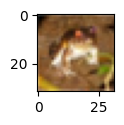

In [ ]:
plot(0)

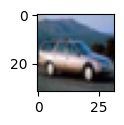

In [ ]:
plot(4)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
x_train_s=x_train/255
x_test_s=x_test/255

In [ ]:
y_train_categorical= keras.utils.to_categorical(y_train,num_classes=10)
y_test_categorical= keras.utils.to_categorical(y_test,num_classes=10)

In [ ]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation="relu"),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(optimizer="SGD",
             loss="categorical_crossentropy",# here i have used the categorical because i have changed the descreate value to categorical value using onehot encoding sooo
             metrics=["accuracy"])

model.fit(x_train_s,y_train_categorical,epochs=50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3074 - loss: 1.9296
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4218 - loss: 1.6463
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4505 - loss: 1.5558
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4821 - loss: 1.4796
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4924 - loss: 1.4374
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5106 - loss: 1.3913
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5246 - loss: 1.3504
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5376 - loss: 1.3139
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5480 - loss: 1.2894
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5633 - loss: 1.2547
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5720 - loss: 1.2217
Epoch 12/50
1563/1563 ━━━━━━━

In [ ]:
np.argmax(model.predict(x_test_s)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


3

In [ ]:
for i in range(5):
    print(classes[np.argmax(model.predict(x_test_s)[i])])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
cat
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ship
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ship
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ship
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
deer


In [ ]:
for i in range(5):
    print(classes[y_test[i][0]])

cat
ship
ship
airplane
frog


In [ ]:
model.evaluate(x_test_s,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5626 - loss: 1.5628


[1.5592962503433228, 0.5611000061035156]

In [ ]:
def get_model():
    model=keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000,activation="relu"),
      keras.layers.Dense(1000,activation="relu"),
      keras.layers.Dense(10,activation="sigmoid")
    ])

    model.compile(optimizer="SGD",
              loss="categorical_crossentropy",# here i have used the categorical because i have changed the descreate value to categorical value using onehot encoding sooo
              metrics=["accuracy"])
    return model

In [ ]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
  cpu_model=get_model()
  cpu_model.fit(x_train_s,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.3025 - loss: 1.9350
2min 4s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
%%timeit -n1 -r1
with tf.device("/GPU:0"):
  cpu_model=get_model()
  cpu_model.fit(x_train_s,y_train_categorical,epochs=1)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3023 - loss: 1.9373
7.78 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
model.save("saved_model1.keras")

In [ ]:
model.save("saved_model2.keras")

In [ ]:
model.save("saved_model3.keras")